In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
selectInputDataIndex = 3 # br pocetne kolone (ne 0)
# poslednja kolona mora biti output

# (units, activationFunc)
hiddenLayers = [(6, "relu"), (6, "relu")]
outputLayer = (1, "sigmoid")

numOfEpochs = 100

data = pd.read_csv("data.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
X = data.iloc[:,selectInputDataIndex:-1].values # Input data
Y = data.iloc[:,-1].values # Output

In [7]:
# Label encoding
labelEncoder = LabelEncoder()
X[:,2] = np.array(labelEncoder.fit_transform(X[:,2]))

In [8]:
# One hot encoding
colTrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(colTrans.fit_transform(X))

In [11]:
# train/test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [12]:
# NOTE: Feature scalling after test/train split
# Standardization = all values range -3 to +3
# Normalization = all values range -1 to +1 -> Used for normal distribution

stScaler = StandardScaler()
Xtrain = stScaler.fit_transform(Xtrain)
Xtest = stScaler.transform(Xtest)

In [13]:
# ANN

# I nacin

ann = tf.keras.models.Sequential() # INIT
#ann.add(tf.keras.layers.Dense(units=6, activation="relu")) # units - num of neurons per in layer, activation - activation func to be used
#ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

for layer in hiddenLayers:
    ann.add(tf.keras.layers.Dense(units=layer[0], activation=layer[1]))

# output layer
#ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

ann.add(tf.keras.layers.Dense(units=outputLayer[0], activation=outputLayer[1]))

ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train
ann.fit(Xtrain, Ytrain, batch_size=32, epochs=numOfEpochs)

Epoch 1/100
250/250 [==============================] - 0s 420us/step - loss: 0.7069 - accuracy: 0.6152
Epoch 2/100
250/250 [==============================] - 0s 424us/step - loss: 0.4870 - accuracy: 0.8018
Epoch 3/100
250/250 [==============================] - 0s 424us/step - loss: 0.4375 - accuracy: 0.8133
Epoch 4/100
250/250 [==============================] - 0s 416us/step - loss: 0.4189 - accuracy: 0.8169
Epoch 5/100
250/250 [==============================] - 0s 428us/step - loss: 0.4103 - accuracy: 0.8219
Epoch 6/100
250/250 [==============================] - 0s 420us/step - loss: 0.4041 - accuracy: 0.8229
Epoch 7/100
250/250 [==============================] - 0s 414us/step - loss: 0.3985 - accuracy: 0.8254
Epoch 8/100
250/250 [==============================] - 0s 417us/step - loss: 0.3925 - accuracy: 0.8298
Epoch 9/100
250/250 [==============================] - 0s 419us/step - loss: 0.3855 - accuracy: 0.8338
Epoch 10/100
250/250 [==============================] - 0s 428us/step - l

In [14]:
predictions = ann.predict(Xtest)

for i in range(len(predictions)):
    print("Prediction {pred} : Actual {actual}".format(pred=float(predictions[i])>0.5, actual=Ytest[i]==1))

Prediction False : Actual False
Prediction False : Actual True
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction True : Actual True
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual True
Prediction True : Actual True
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction True : Actual True
Prediction False : Actual True
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction True : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction False : Actual False
Prediction True : 

In [15]:
# SAVING NN
name = "test"
ann.save(name+".h5")

# NOTE: h5 format is used to save nn as a serialized object


In [16]:
ann1 = tf.keras.models.load_model("test.h5")

In [76]:
print(ann1.predict(Xtest))

[[0.35797942]
 [0.25930858]
 [0.19721416]
 ...
 [0.26370874]
 [0.23617446]
 [0.1738748 ]]


In [28]:
###################### Visualize NN
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

In [61]:
# II nacin

numOfFeatures = Xtrain.shape[1]

inputs = tf.keras.layers.Input(name="input", shape=(numOfFeatures,))

h1 = tf.keras.layers.Dense(name="h1", units=int(round(numOfFeatures+1)/2), activation = "relu")(inputs)
#h1 = tf.keras.layers.Dropout(name="drop1", rate=0.2) (h1)

h2 = tf.keras.layers.Dense(name="h2", units=int(round(numOfFeatures+1)/6), activation = "relu")(h1)
#h2 = tf.keras.layers.Dropout(name="drop2", rate=0.2) (h2)

output = tf.keras.layers.Dense(name="output", units = 1, activation="sigmoid")(h2)

model = tf.keras.models.Model(inputs = inputs, outputs=output)

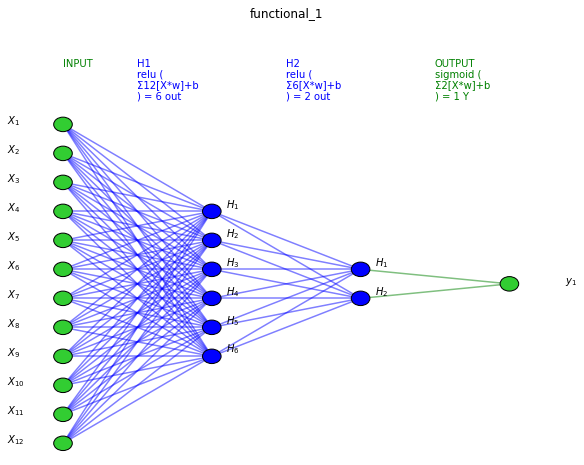

In [59]:
visualize_nn(model, description=True, figsize=(10,8))

In [60]:
model.compile(optimizer="adam", loss="mean_absolute_error", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, epochs=100, shuffle=True, validation_split = 0.3)

Epoch 1/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.7961 - val_loss: 0.3528 - val_accuracy: 0.7958
Epoch 2/100
175/175 [==============================] - 0s 629us/step - loss: 0.2936 - accuracy: 0.7961 - val_loss: 0.2518 - val_accuracy: 0.7958
Epoch 3/100
175/175 [==============================] - 0s 583us/step - loss: 0.2318 - accuracy: 0.7961 - val_loss: 0.2202 - val_accuracy: 0.7958
Epoch 4/100
175/175 [==============================] - 0s 594us/step - loss: 0.2138 - accuracy: 0.7961 - val_loss: 0.2108 - val_accuracy: 0.7958
Epoch 5/100
175/175 [==============================] - 0s 594us/step - loss: 0.2078 - accuracy: 0.7961 - val_loss: 0.2075 - val_accuracy: 0.7958
Epoch 6/100
175/175 [==============================] - 0s 623us/step - loss: 0.2054 - accuracy: 0.7961 - val_loss: 0.2057 - val_accuracy: 0.7958
Epoch 7/100
175/175 [==============================] - 0s 635us/step - loss: 0.2036 - accuracy: 0.7961 - val_loss: 0.2042 - val_accu